Hello again! 🖐🏼

In this notebook, we will:  
* Preprocess image data  
* Visualize data  
* Create a CNN model for binary classification (Pizza or Steak)  
* Evaluate the model  

Let’s get started!😉

In [ ]:
# Download data for our model

import zipfile
import os

if not os.path.exists('pizza_steak.zip'):
  ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2024-09-03 19:26:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.8MB/s    in 3.3s    

2024-09-03 19:26:53 (31.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
! ls pizza_steak/train

pizza  steak


In [ ]:
! ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [1]:
import os
# Let see how many picture we have.
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


## Data Preprocessing

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

IMAGE_SIZE = (224,224)

# Optimize training data by modifying images
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMAGE_SIZE,
                                               class_mode = 'binary',
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= IMAGE_SIZE,
                                             class_mode='binary'
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Visualize

In [ ]:
train_data.batch_size

32

In [ ]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

In [ ]:
train_data.n

1500

In [ ]:
train_data.num_batches

47

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(class_name, diractory):

  folder = diractory+'/'+class_name

  random_image = random.sample(os.listdir(folder), 1)

  img = mpimg.imread(folder + '/'  + random_image[0])

  plt.imshow(img)
  plt.title(class_name)
  plt.axis(False)

  return img


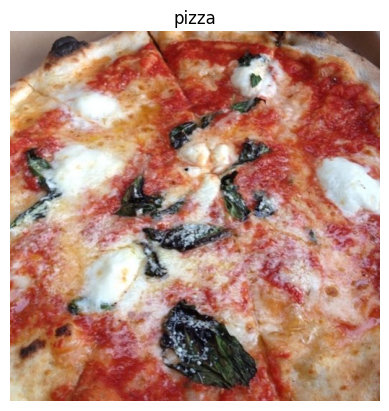

In [4]:
pizza_img =  show_random_image('pizza','/content/pizza_steak/train')

In [8]:
pizza_img.shape

(512, 512, 3)

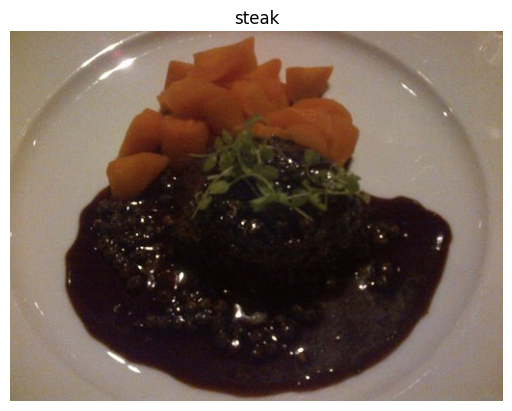

In [5]:
steak_img = show_random_image('steak','/content/pizza_steak/train')

In [7]:
steak_img.shape

(384, 512, 3)

## Let's create our CNN model now.

In [25]:
import tensorflow as tf

tf.random.set_seed(42)

# Model shape
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

# Compile Model

cnn_model.compile(optimizer= tf.keras.optimizers.Adam(),
                  loss= tf.keras.losses.BinaryCrossentropy,
                  metrics = ['accuracy'])

# Fitting the model
history = cnn_model.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = 0,
                        validation_data = test_data,
                        validation_steps= 0)



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.5186 - loss: 0.6935 - val_accuracy: 0.6180 - val_loss: 0.6832
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 363ms/step - accuracy: 0.6467 - loss: 0.6634 - val_accuracy: 0.7780 - val_loss: 0.5323
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 363ms/step - accuracy: 0.7368 - loss: 0.5537 - val_accuracy: 0.8380 - val_loss: 0.4034
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 361ms/step - accuracy: 0.7528 - loss: 0.5015 - val_accuracy: 0.8500 - val_loss: 0.3583
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.7685 - loss: 0.4908 - val_accuracy: 0.8700 - val_loss: 0.3263


## Evaluate the model

In [28]:
cnn_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8520 - loss: 0.3526


[0.3262558579444885, 0.8700000047683716]

Text(0.5, 0, 'epoch')

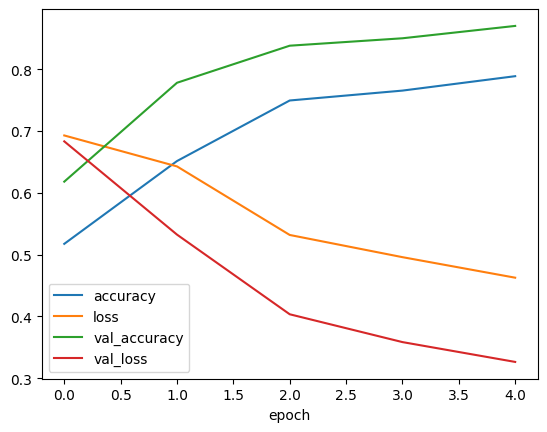

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.xlabel('epoch')

**Great to see the model's accuracy!** 😎  
Now, we want to examine the model's output for a random image. Let's define a function to explore this.

In [39]:
def pred_random_image(model, directory, class_names):
    steak_img_folder = os.path.join(directory, 'steak')
    pizza_img_folder = os.path.join(directory, 'pizza')

    # Randomly sample 5 images from each category
    steak_imgs = random.sample(os.listdir(steak_img_folder), 5)
    pizza_imgs = random.sample(os.listdir(pizza_img_folder), 5)

    num_rows = 5
    num_cols = 5
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

    for i in range(10):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)

        if i < 5:
            img_path = os.path.join(steak_img_folder, steak_imgs[i])
        else:
            img_path = os.path.join(pizza_img_folder, pizza_imgs[i - 5])

        # Load and preprocess the image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)
        img_shape = 224
        resized_img = tf.image.resize(img, [img_shape, img_shape])
        resized_img = resized_img / 255.0

        # Predict the class
        prob = model.predict(tf.expand_dims(resized_img, axis=0))
        pred = class_names[int(tf.squeeze(tf.round(prob)))]

        # Display the image with the prediction
        plt.imshow(resized_img)
        plt.axis('off')
        plt.title(f"The model prediction is: {pred}")

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


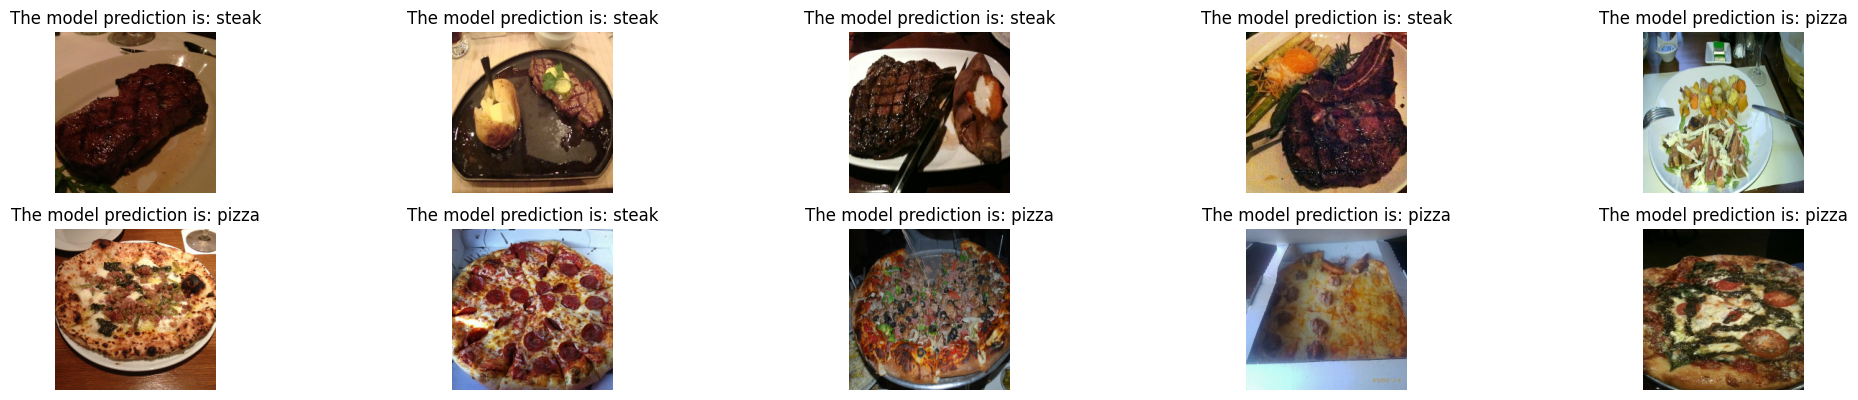

In [41]:
pred_random_image(cnn_model,'/content/pizza_steak/test',['pizza','steak'])

### **And done**✔✔✔